In [34]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import date
from scipy import stats

In [2]:
data_path = '../../data/metadata/'

In [13]:
fandom_list = [i.strip() for i in open('../../data/fandom_filtered_list')]

In [14]:
len(fandom_list)

25

In [17]:
df = pd.read_csv(os.path.join(data_path, fandom_list[0]+'_metadata.tsv'), sep = '\t')

In [18]:
df.head(2)

,AdditionalTags,ArchiveWarnings,Author,Bookmarks,Category,ChapterIndex,Chapters,Characters,Comments,CompleteDate,...,Language,Notes,PublishDate,Rating,Relationship,Summary,Title,URL,UpdateDate,Words
0,"Plot What Plot/Porn Without Plot, Vaginal Fing...",Underage,MorganasCrow,0,F/F,NaN,1,"Morgana (Merlin), Morgause (Merlin)",0,2015-06-16,...,English,NaN,2015-06-16,Explicit,Morcest,Morgana and Morgause enjoy wild games.,What The Fag You Think You\'re Doing?,http://archiveofourown.org/works/4146375?view_...,NaN,933.0
1,"blind!Arthur, Blindness, Minor Violence, Impli...",Creator Chose Not To Use Archive Warnings,SoCanonItHurts,4,M/M,NaN,1,"Merlin (Merlin), Arthur Pendragon (Merlin), Gw...",0,NaN,...,English,"Warning: I know nothing about being blind, all...",2016-04-17,Mature,"Merlin/Arthur Pendragon, Gwaine/Merlin (Merlin...",Merlin has a wonderful night with a mysteriou...,Obstacles in Our Way,http://archiveofourown.org/works/6575791?view_...,2016-04-16,1317.0


In [19]:
def date_today(cell):
    if '-' in str(cell):
        y, m, d = cell.split('-')
        return abs(date.today() - date(int(y), int(m), int(d))).days

/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


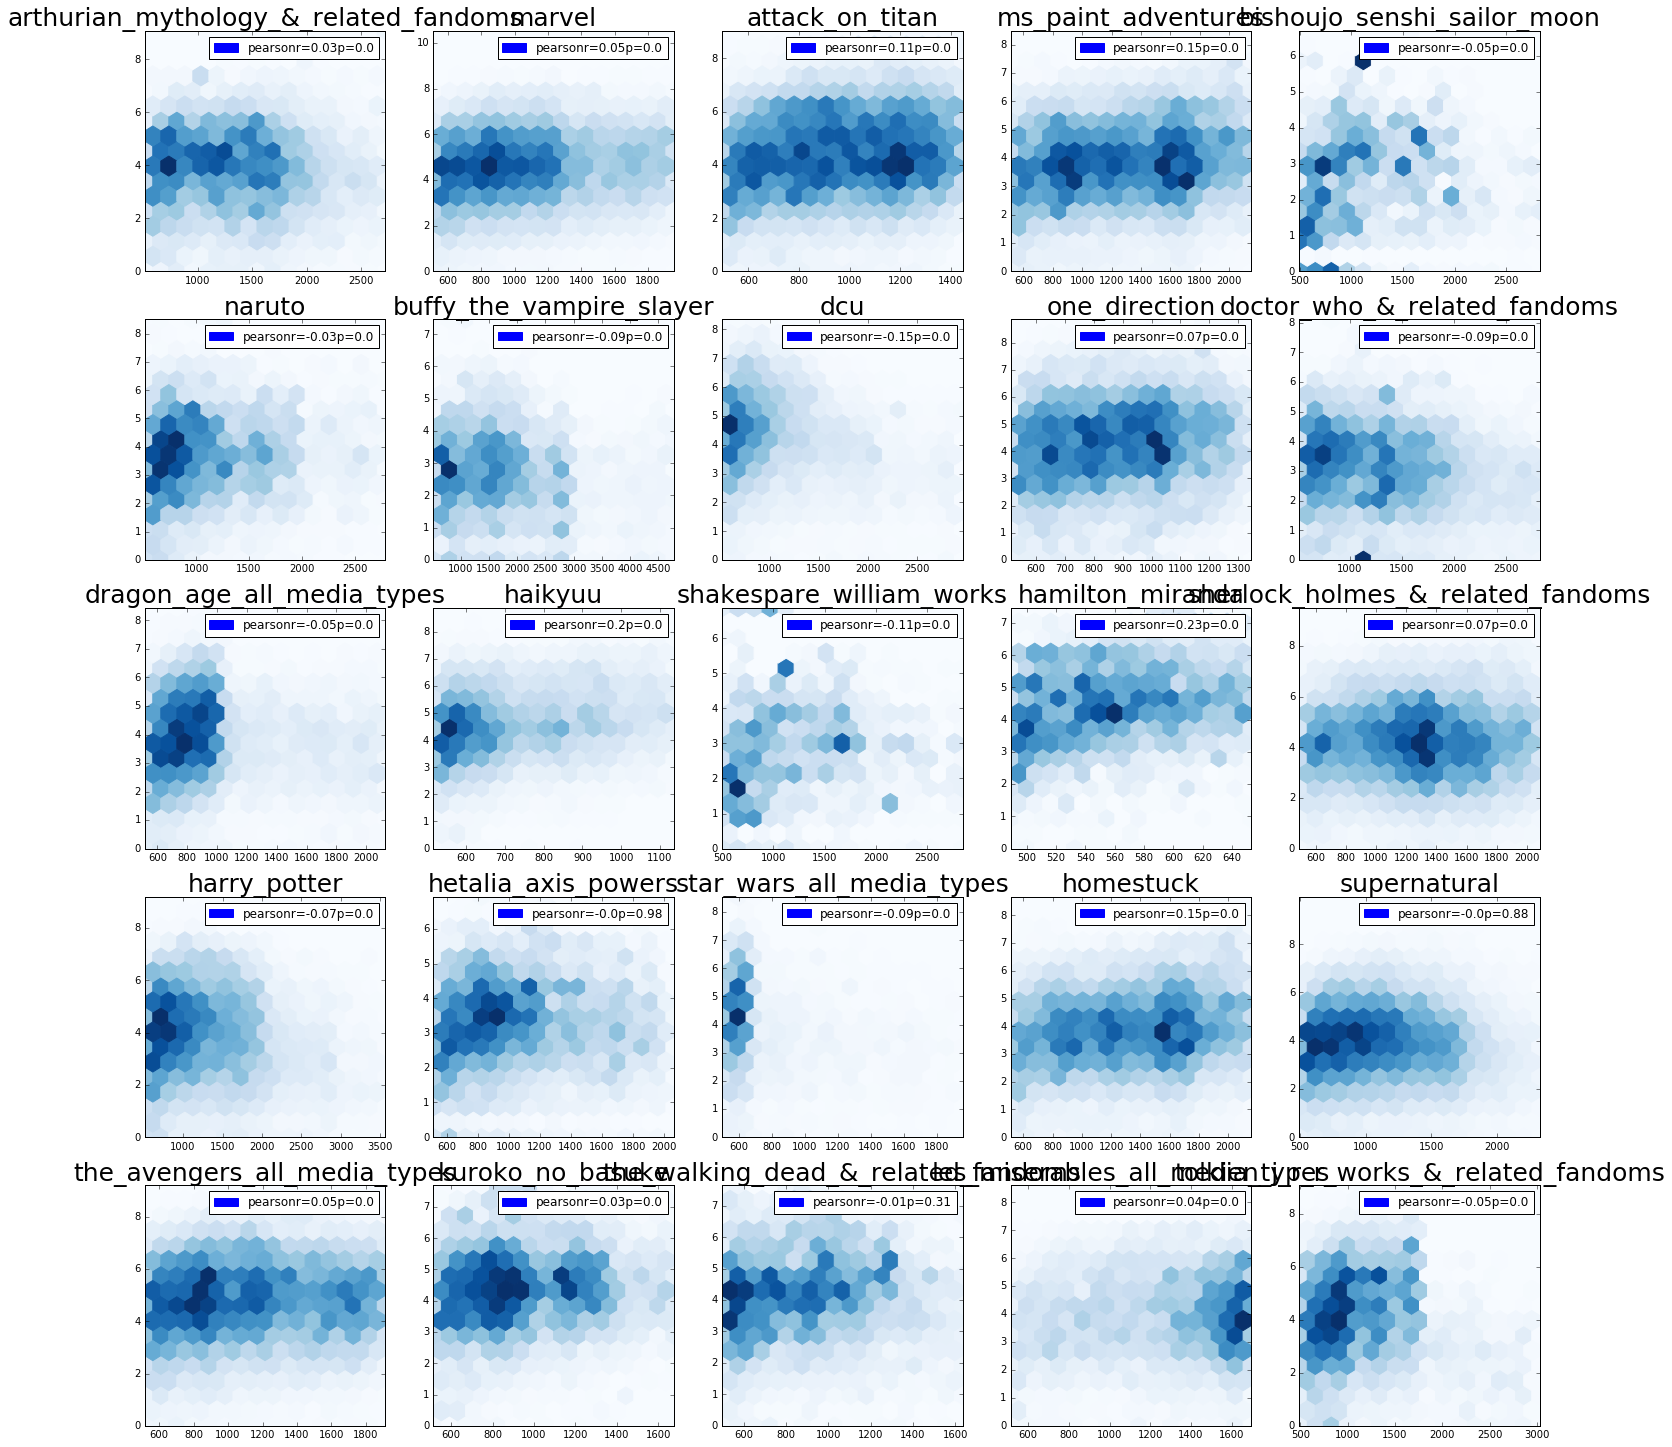

In [49]:
fig, axs = plt.subplots(5, 5, figsize=(25, 25))
axs = axs.ravel()

for idx, fandom in enumerate(fandom_list):
    df = pd.read_csv(data_path + fandom + '_metadata.tsv', sep = '\t')
        
    df['PublishDate'] = df.apply(lambda row: date_today(row['PublishDate']), axis = 1)
    df['CompleteDate'] = df.apply(lambda row: date_today(row['CompleteDate']), axis = 1)
    df = df.dropna(subset=['PublishDate', 'Kudos'])

    r, p = stats.pearsonr(df['PublishDate'],df['Kudos'])

    df = df.sort(columns='PublishDate').head(len(df) - int(len(df)*0.05))
    x = df['PublishDate']
    y = np.log(df['Kudos'])
    
    axs[idx].hexbin(x,y,gridsize=15, cmap='Blues')
    axs[idx].set_title(fandom, fontsize=25)
    l = "pearsonr="+ str(round(r, 2)) + "p=" + str(round(p, 2))
    axs[idx].legend([l] )
    
plt.savefig('age_kudos_correalation.pdf', format='pdf')
    

/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


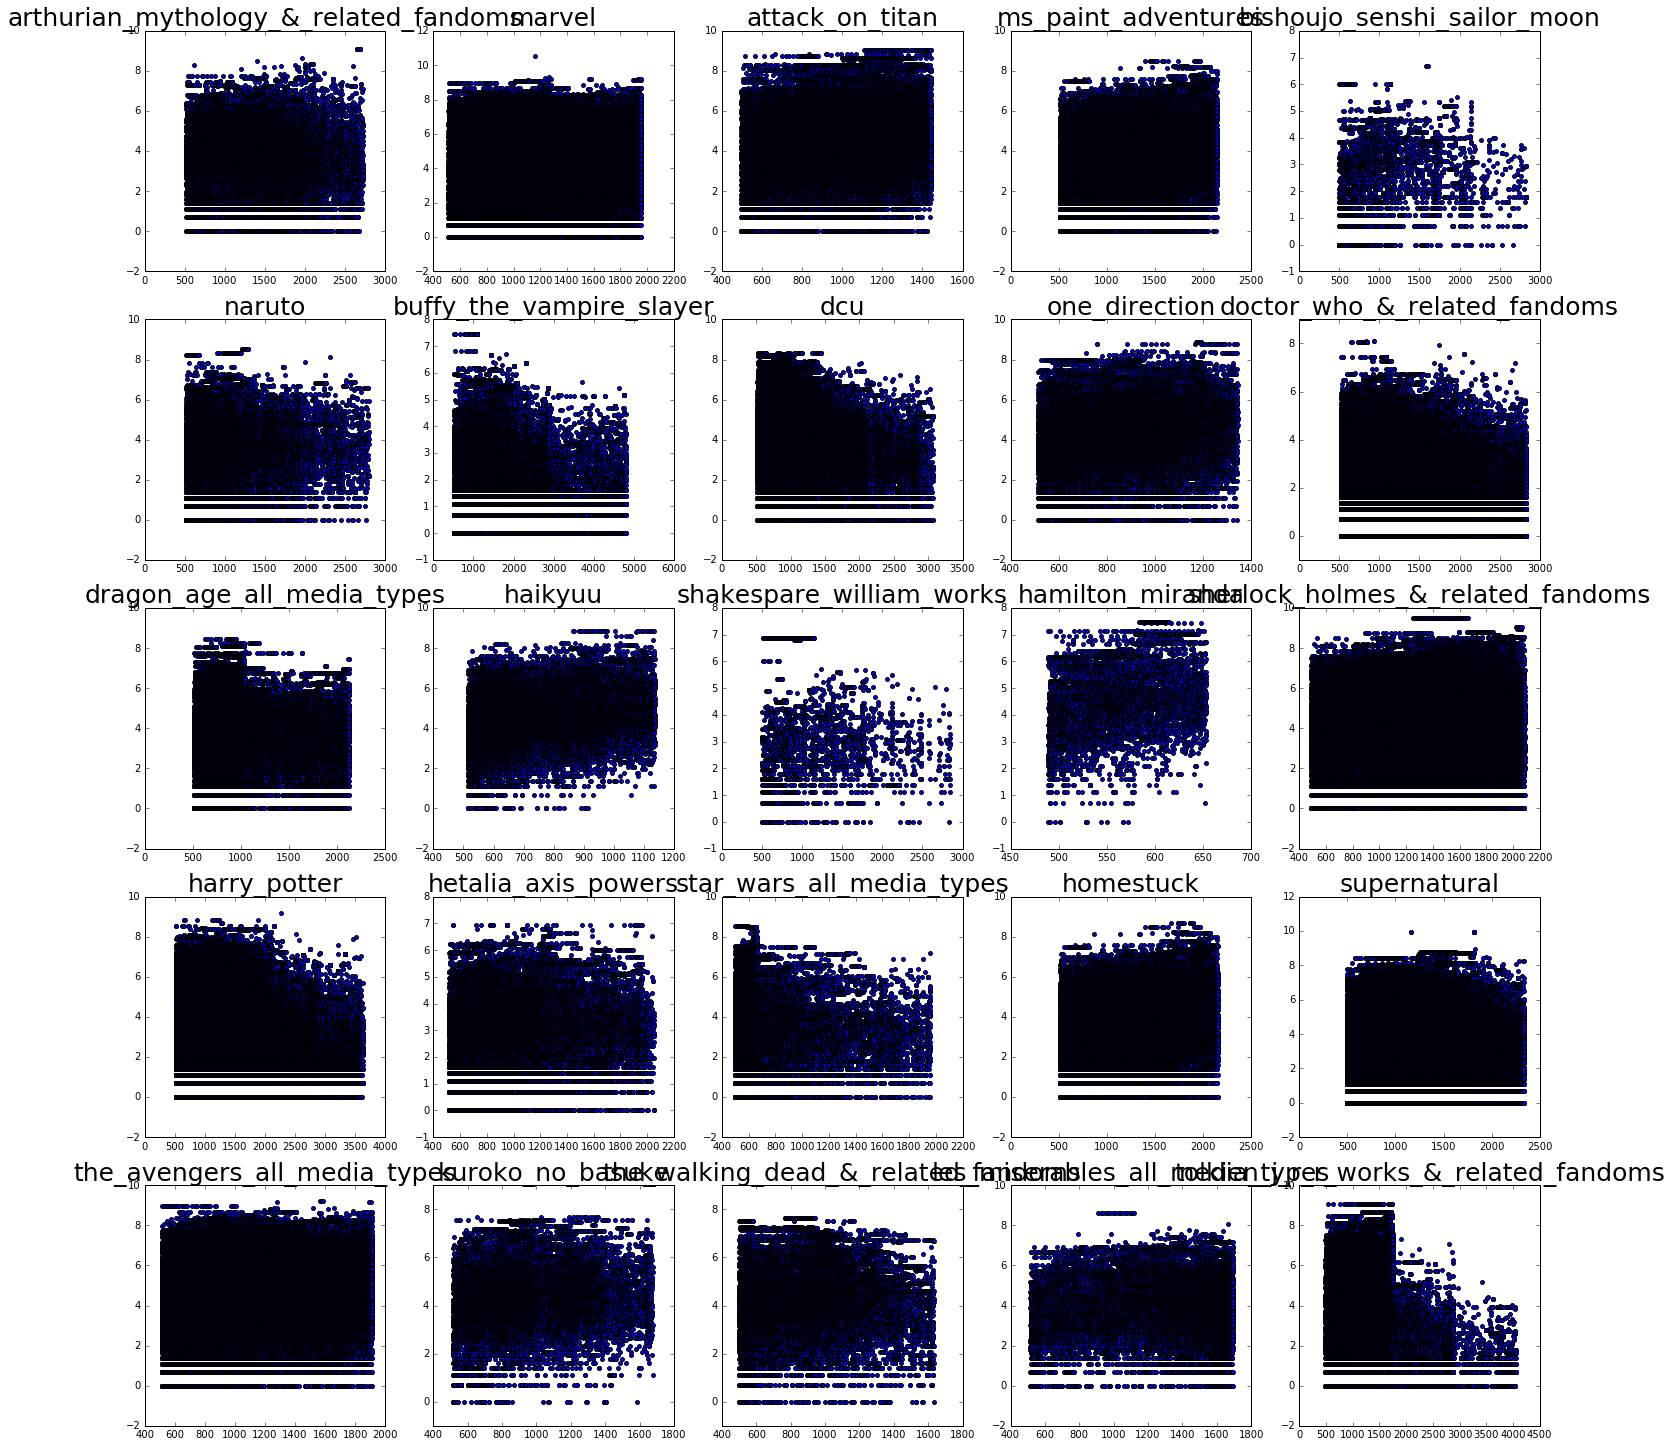

In [26]:
fig, axs = plt.subplots(5, 5, figsize=(25, 25))
axs = axs.ravel()

for idx, fandom in enumerate(fandom_list):
    df = pd.read_csv(data_path + fandom + '_metadata.tsv', sep = '\t')
        
    df['PublishDate'] = df.apply(lambda row: date_today(row['PublishDate']), axis = 1)
    df['CompleteDate'] = df.apply(lambda row: date_today(row['CompleteDate']), axis = 1)
    
    df = df.sort(columns='PublishDate').head(len(df) - int(len(df)*0.05))
    x = df['PublishDate']
    y = np.log(df['Kudos'])
    
    axs[idx].scatter(x,y,s=15)
    axs[idx].set_title(fandom, fontsize=25)
#     except:
#         pass
# fig.text(0.5, 0.1,'Time', ha='center', va='center', fontsize=25)
# fig.text(0.08, 0.5, 'Average Cosine', ha='center', va='center', rotation='vertical',fontsize=25)

# plt.savefig('temporal_cos_dist_hex.png', format='png')
    

In [35]:
for idx, fandom in enumerate(fandom_list):
    df = pd.read_csv(data_path + fandom + '_metadata.tsv', sep = '\t')
        
    df['PublishDate'] = df.apply(lambda row: date_today(row['PublishDate']), axis = 1)
    df['CompleteDate'] = df.apply(lambda row: date_today(row['CompleteDate']), axis = 1)
    
    df = df.dropna(subset=['PublishDate', 'Kudos'])
#     df = df.sort(columns='PublishDate').head(len(df) - int(len(df)*0.05))
    x = df['PublishDate']
    y = np.log(df['Kudos'])

    print(fandom, stats.pearsonr(x,y))

arthurian_mythology_&_related_fandoms (-0.075605401432410388, 4.9803784647519525e-61)
marvel (0.053001364870118285, 6.7040378352432321e-238)
attack_on_titan (0.15760459814617661, 0.0)
ms_paint_adventures (0.18099514075219281, 0.0)
bishoujo_senshi_sailor_moon (-0.0011354884952896299, 0.93070078146368251)
naruto (0.0072368951433306478, 0.17549469201430451)
buffy_the_vampire_slayer (-0.12945335365676208, 2.1902678850017672e-177)
dcu (-0.30745874747930663, 0.0)
one_direction (0.10764666107671025, 4.709165241728894e-129)
doctor_who_&_related_fandoms (-0.15098056229099288, 0.0)
dragon_age_all_media_types (-0.061866173461317321, 5.4708506949938475e-96)
haikyuu (0.25478958370877153, 0.0)
shakespare_william_works (0.010394286413265287, 0.53832618578767888)
hamilton_miranda (0.25024169007932456, 1.9209600228158664e-100)
sherlock_holmes_&_related_fandoms (0.031413168963592926, 5.8755364319612099e-46)
harry_potter (-0.16176958411100528, 0.0)
hetalia_axis_powers (0.022565004429428961, 8.08869546385

/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


tolkien_j_r_r_works_&_related_fandoms (-0.27352692491937536, 0.0)
